In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# Implementación de NSGA-III para 2 objetivos (funciones)
# f1(x) = x^2 
# f2(x) = (x - 2)^2

class NSGA3:
    def __init__(self, pop_size=100, n_gen=50, n_var=1, bounds=(0, 2), n_objs=2, ref_dirs=None):
        self.pop_size = pop_size
        self.n_gen = n_gen
        self.n_var = n_var
        self.bounds = bounds
        self.n_objs = n_objs
        
        if ref_dirs is None:
            points = np.linspace(0, 1, pop_size)
            self.ref_dirs = np.vstack([points, 1 - points]).T
        else:
            self.ref_dirs = ref_dirs

    def iniciar(self):
        return np.random.uniform(self.bounds[0], self.bounds[1], size=(self.pop_size, self.n_var))

    def eval(self, pop):
        f1 = np.sum(pop**2, axis=1)
        f2 = np.sum((pop - 2)**2, axis=1)
        return np.vstack([f1, f2]).T

    def no_dom(self, F):
        N = len(F)
        S = [[] for _ in range(N)]
        n = np.zeros(N, dtype=int)
        frente = [[]]
        for p in range(N):
            for q in range(N):
                if all(F[p] <= F[q]) and any(F[p] < F[q]):
                    S[p].append(q)
                elif all(F[q] <= F[p]) and any(F[q] < F[p]):
                    n[p] += 1
            if n[p] == 0:
                frente[0].append(p)
        i = 0
        while frente[i]:
            next_front = []
            for p in frente[i]:
                for q in S[p]:
                    n[q] -= 1
                    if n[q] == 0:
                        next_front.append(q)
            i += 1
            frente.append(next_front)
        frente.pop()
        return frente

    def predic(self, F_objs, frente): # distancia a la perpendicular
        
        assoc = {}
        norms = np.linalg.norm(self.ref_dirs, axis=1)
        dir_unit = self.ref_dirs / norms[:, None]
        for i in sum(frente, []):
            vec = F_objs[i]
            proj = vec @ dir_unit.T          
            perp = np.linalg.norm(vec - proj[:, None] * dir_unit, axis=1)
            assoc[i] = np.argmin(perp)
        return assoc

    def nicho(self, frente, assoc):
        slcc = []
        for front in frente:
            if len(slcc) + len(front) <= self.pop_size:
                slcc.extend(front)
            else:
                count = {d: list(assoc.values()).count(d) for d in range(len(self.ref_dirs))}
                rat = self.pop_size - len(slcc)
                
                sorted_front = sorted(front, key=lambda x: count[assoc[x]])
                slcc.extend(sorted_front[:rat])
                break
        return slcc

    def evo(self):
        pop = self.iniciar()
        for g in range(self.n_gen):
            F_pop = self.eval(pop)
            # Generar descendencia
            hijos = []
            while len(hijos) < self.pop_size:
                a, b = np.random.choice(len(pop), 2, replace=False)
                u = np.random.rand(self.n_var)
                hijo = np.where(
                    u < 0.5,
                    0.5*((1+u)**(1/1.5)*pop[a] + (1-u)**(1/1.5)*pop[b]),
                    0.5*((1-u)**(1/1.5)*pop[a] + (1+u)**(1/1.5)*pop[b])
                )
                hijo += np.random.normal(0, 0.1, size=hijo.shape)
                hijo = np.clip(hijo, self.bounds[0], self.bounds[1])
                hijos.append(hijo)
            hijos = np.array(hijos)

            
            R = np.vstack([pop, hijos])
            F_R = self.eval(R)
            frente_R = self.no_dom(F_R)
            assoc = self.predic(F_R, frente_R)
            idx = self.nicho(frente_R, assoc)
            pop = R[idx]

        F_final = self.eval(pop)
        frente_final = self.no_dom(F_final)
        return pop, F_final, frente_final





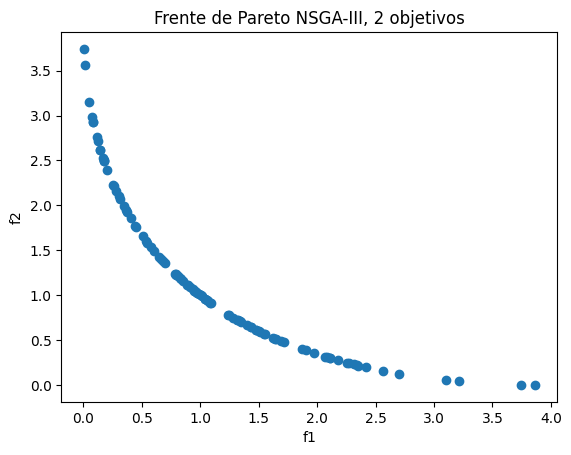

Índices del frente de Pareto: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Valores de los objetivos en el frente de Pareto:
Solución 0: f1=1.9694, f2=0.3560
Solución 1: f1=1.3978, f2=0.6686
Solución 2: f1=0.2567, f2=2.2300
Solución 3: f1=0.9874, f2=1.0127
Solución 4: f1=0.6083, f2=1.4885
Solución 5: f1=2.5610, f2=0.1598
Solución 6: f1=1.0600, f2=0.9418
Solución 7: f1=0.7853, f2=1.2407
Solución 8: f1=0.3439, f2=1.9983
Solución 9: f1=1.2839, f2=0.7515
Solución 10: f1=1.6493, f2=0.5123
Solución 11: f1=3.2107, f2=0.0433
Solución 12: f1=2.1800, f2=0.2741
Solución 13: f1=0.3153, f2=2.0693
Solución 14: f1=0.6498, f2=1.4254
Solución 15: f1=0.2042, f2=2.3

In [25]:

# ejecución y comportamiento del frente de Pareto
def main():
    nsga3 = NSGA3(pop_size=100, n_gen=50)
    pop, objs, fronts = nsga3.evo()
    
    plt.scatter(objs[:,0], objs[:,1])
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.title('Frente de Pareto NSGA-III, 2 objetivos')
    plt.show()

    pareto_idx = fronts[0]
    print("Índices del frente de Pareto:", pareto_idx)
    print("Valores de los objetivos en el frente de Pareto:")
    for i in pareto_idx:
        print(f"Solución {i}: f1={objs[i,0]:.4f}, f2={objs[i,1]:.4f}")

if __name__ == '__main__':
    main()

In [26]:
# Implementación de NSGA-III para 3 objetivos (funciones)
# f1(x) = x^2 
# f2(x) = (x - 2)^2
# f3(x) = (x - 1)^2

class NSGA3:
    def __init__(self, pop_size=100, n_gen=50, n_var=1, cotas=(0, 2), n_objs=3, ref_dirs=None):
        self.pop_size = pop_size
        self.n_gen = n_gen
        self.n_var = n_var
        self.cotas = cotas
        self.n_objs = n_objs
        if ref_dirs is None:
            w = np.random.rand(pop_size, n_objs)
            self.ref_dirs = w / np.linalg.norm(w, axis=1, keepdims=True)
        else:
            self.ref_dirs = ref_dirs

    def iniciar(self):
        return np.random.uniform(self.cotas[0], self.cotas[1], size=(self.pop_size, self.n_var))

    def eval(self, pop):
        f1 = np.sum(pop**2, axis=1)
        f2 = np.sum((pop - 2)**2, axis=1)
        f3 = np.sum((pop - 1)**2, axis=1)
        return np.vstack([f1, f2, f3]).T  

    def no_dom(self, F):
        N = len(F)
        S = [[] for _ in range(N)]
        n = np.zeros(N, dtype=int)
        frente = [[]]
        for p in range(N):
            for q in range(N):
                if all(F[p] <= F[q]) and any(F[p] < F[q]):
                    S[p].append(q)
                elif all(F[q] <= F[p]) and any(F[q] < F[p]):
                    n[p] += 1
            if n[p] == 0:
                frente[0].append(p)
        i = 0
        while frente[i]:
            sig_frente = []
            for p in frente[i]:
                for q in S[p]:
                    n[q] -= 1
                    if n[q] == 0:
                        sig_frente.append(q)
            i += 1
            frente.append(sig_frente)
        frente.pop()
        return frente

    def predic(self, F_objs, frente):
        assoc = {}
        dir_unit = self.ref_dirs
        for i in sum(frente, []):
            vec = F_objs[i]
            proj = vec @ dir_unit.T          
            perp = np.linalg.norm(vec - proj[:, None] * dir_unit, axis=1)
            assoc[i] = np.argmin(perp)
        return assoc

    def nicho(self, frente, assoc):
        slcc = []
        for front in frente:
            if len(slcc) + len(front) <= self.pop_size:
                slcc.extend(front)
            else:
                count = {d: list(assoc.values()).count(d) for d in range(len(self.ref_dirs))}
                rat = self.pop_size - len(slcc)
                sorted_front = sorted(front, key=lambda x: count[assoc[x]])
                slcc.extend(sorted_front[:rat])
                break
        return slcc

    def evo(self):
        pop = self.iniciar()
        for _ in range(self.n_gen):
            F_pop = self.eval(pop)
            hijos = []
            while len(hijos) < self.pop_size:
                a, b = np.random.choice(len(pop), 2, replace=False)
                u = np.random.rand(self.n_var)
                hijo = np.where(
                    u < 0.5,
                    0.5 * ((1+u)**(1/1.5) * pop[a] + (1-u)**(1/1.5) * pop[b]),
                    0.5 * ((1-u)**(1/1.5) * pop[a] + (1+u)**(1/1.5) * pop[b])
                )
                hijo += np.random.normal(0, 0.1, size=hijo.shape)
                hijo = np.clip(hijo, self.cotas[0], self.cotas[1])
                hijos.append(hijo)
            hijos = np.array(hijos)

            R = np.vstack([pop, hijos])
            F_R = self.eval(R)
            frente_R = self.no_dom(F_R)
            assoc = self.predic(F_R, frente_R)
            idx = self.nicho(frente_R, assoc)
            pop = R[idx]

        F_final = self.eval(pop)
        frente_final = self.no_dom(F_final)
        return pop, F_final, frente_final

Índices del frente de Pareto: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Valores de los objetivos en el frente de Pareto:
Solución 0: f1=0.9123, f2=1.0917, f3=0.0020
Solución 1: f1=0.0000, f2=4.0000, f3=1.0000
Solución 2: f1=0.9023, f2=1.1027, f3=0.0025
Solución 3: f1=0.0629, f2=3.0598, f3=0.5613
Solución 4: f1=1.4938, f2=0.6049, f3=0.0494
Solución 5: f1=1.5587, f2=0.5648, f3=0.0617
Solución 6: f1=1.4792, f2=0.6143, f3=0.0467
Solución 7: f1=1.1282, f2=0.8795, f3=0.0039
Solución 8: f1=1.1309, f2=0.8771, f3=0.0040
Solución 9: f1=1.1274, f2=0.8802, f3=0.0038
Solución 10: f1=1.1274, f2=0.8802, f3=0.0038
Solución 11: f1=1.1321, f2=0.8761, f3=0.0041


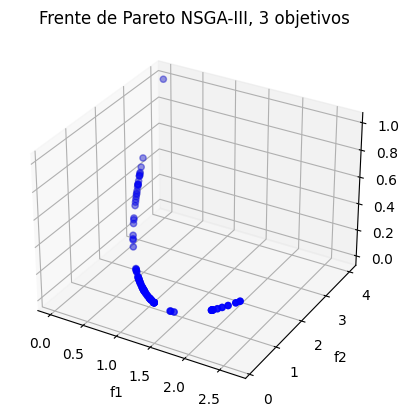

In [27]:
# ejecución y comportamiento del frente de Pareto
def main():
    nsga3 = NSGA3(pop_size=100, n_gen=50)
    pop, objs, fronts = nsga3.evo()
    
    pareto_idx = fronts[0]
    print("Índices del frente de Pareto:", pareto_idx)
    print("Valores de los objetivos en el frente de Pareto:")
    for i in pareto_idx:
        print(f"Solución {i}: f1={objs[i,0]:.4f}, f2={objs[i,1]:.4f}, f3={objs[i,2]:.4f}")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(objs[:,0], objs[:,1], objs[:,2], c='gray', alpha=0.3)
    ax.scatter(objs[pareto_idx,0], objs[pareto_idx,1], objs[pareto_idx,2], c='blue')
    ax.set_xlabel('f1')
    ax.set_ylabel('f2')
    ax.set_zlabel('f3')
    ax.set_title('Frente de Pareto NSGA-III, 3 objetivos')
    plt.show()

if __name__ == '__main__':
    main()